In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.info

In [ ]:
X_data, y_data = train_data.values[:,1:], train_data.values[:,0]
X_data = X_data / 255.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D, Reshape, BatchNormalization, Flatten
from keras.losses import sparse_categorical_crossentropy

In [ ]:
model = Sequential()
model.add(Reshape(input_shape=(784,), target_shape=(28, 28, 1)))
model.add(Convolution2D(6, (3,3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 6)         104       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 2304)             

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2)

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val,y_val))

Epoch 1/5
237/237 [==============================] - 24s 102ms/step - loss: 0.2035 - accuracy: 0.9387 - val_loss: 0.4314 - val_accuracy: 0.9280
Epoch 2/5
237/237 [==============================] - 23s 98ms/step - loss: 0.0569 - accuracy: 0.9838 - val_loss: 0.0659 - val_accuracy: 0.9823
Epoch 3/5
237/237 [==============================] - 23s 98ms/step - loss: 0.0294 - accuracy: 0.9916 - val_loss: 0.0615 - val_accuracy: 0.9816
Epoch 4/5
237/237 [==============================] - 23s 99ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.0661 - val_accuracy: 0.9791
Epoch 5/5
237/237 [==============================] - 23s 98ms/step - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.0569 - val_accuracy: 0.9836


In [ ]:
valid_loss, valid_acc = model.evaluate(X_test, y_test, verbose=2)
print('Valid accuracy:', valid_acc)

132/132 - 1s - loss: 0.0549 - accuracy: 0.9850
Valid accuracy: 0.9850000143051147


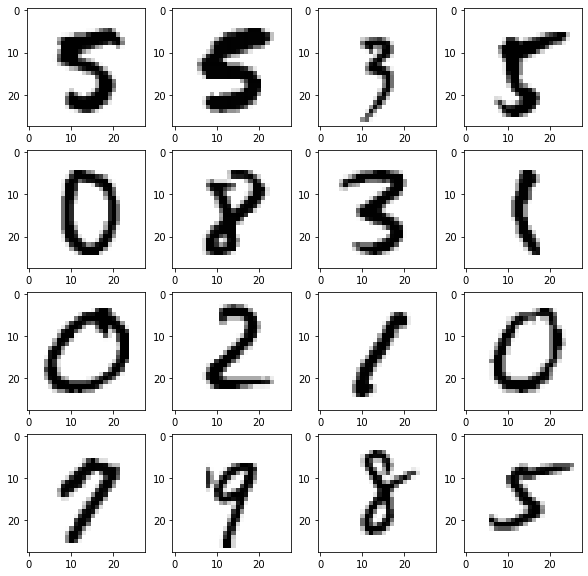

In [ ]:
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 4
for i in range(0, columns*rows):
    img = np.array(X_train[i]).reshape(28,28)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, interpolation='nearest',cmap=plt.cm.gray_r)
plt.show()